Testes com os dados do covid no ES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://bi.static.es.gov.br/covid19/MICRODADOS.csv', sep = ';', encoding = 'iso8859_15')

In [42]:
df.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataEncerramento',
       'DataObito', 'Classificacao', 'Evolucao', 'CriterioConfirmacao',
       'StatusNotificacao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude'],
      dtype='object')

In [3]:
data_obitos = df['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos = data_obitos[len(data_obitos)%7:len(data_obitos)]
dias = df['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias = dias[len(dias)%7:len(dias)]

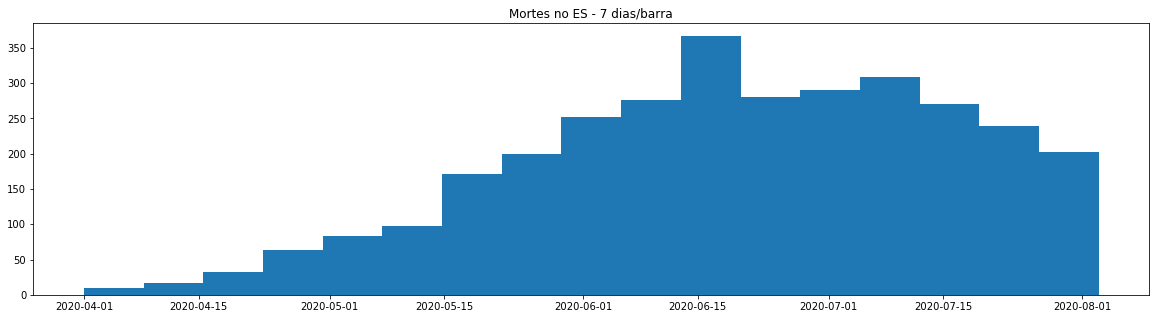

In [4]:
plt.figure(figsize = (20,5))
plt.hist(data_obitos, len(dias)//7)
plt.title('Mortes no ES - 7 dias/barra')
plt.show()

In [5]:
cidades = df['Municipio'].sort_values().drop_duplicates().to_numpy()

In [6]:
gv = ['VITORIA', 'VILA VELHA', 'CARIACICA', 'SERRA', 'VIANA']
df2 = df[df['Municipio'].isin(gv)]

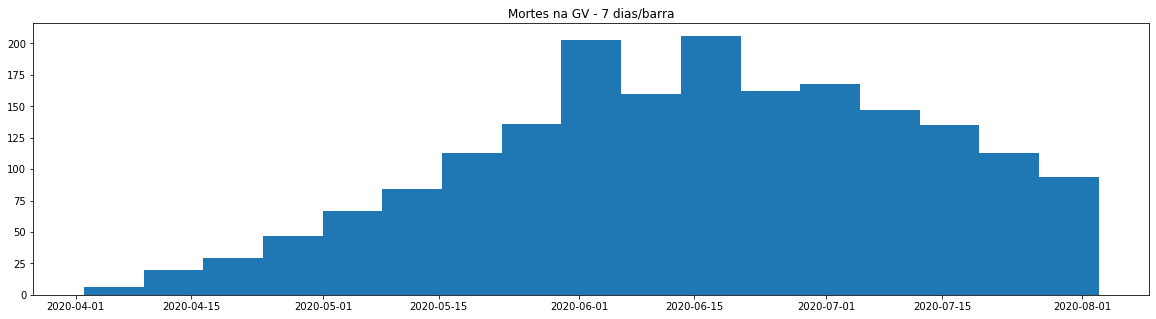

In [7]:
data_obitos2 = df2['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos2 = data_obitos2[len(data_obitos2)%7:len(data_obitos2)]
dias2 = df2['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias2 = dias2[len(dias2)%7:len(dias2)]

plt.figure(figsize = (20,5))
plt.hist(data_obitos2, len(dias2)//7)
plt.title('Mortes na GV - 7 dias/barra')
plt.show()

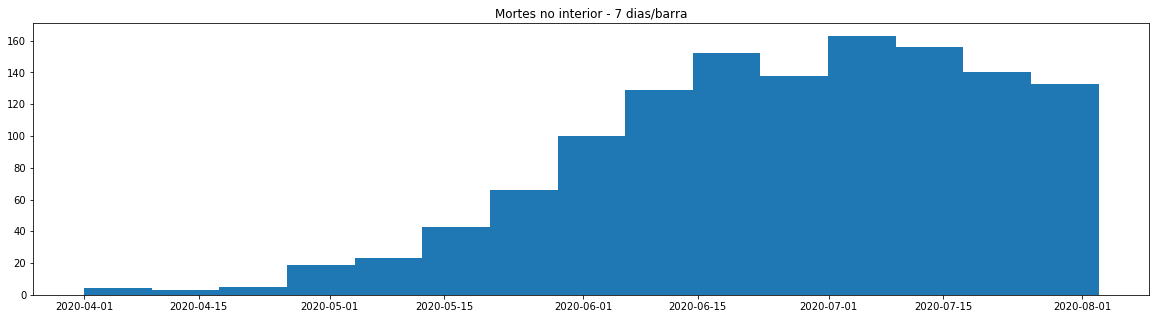

In [8]:
df3 = df[~df['Municipio'].isin(gv)]

data_obitos3 = df3['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos3 = data_obitos3[len(data_obitos3)%7:len(data_obitos3)]
dias3 = df3['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias3 = dias3[len(dias3)%7:len(dias3)]

plt.figure(figsize = (20,5))
plt.hist(data_obitos3, len(dias3)//7)
plt.title('Mortes no interior - 7 dias/barra')
plt.show()

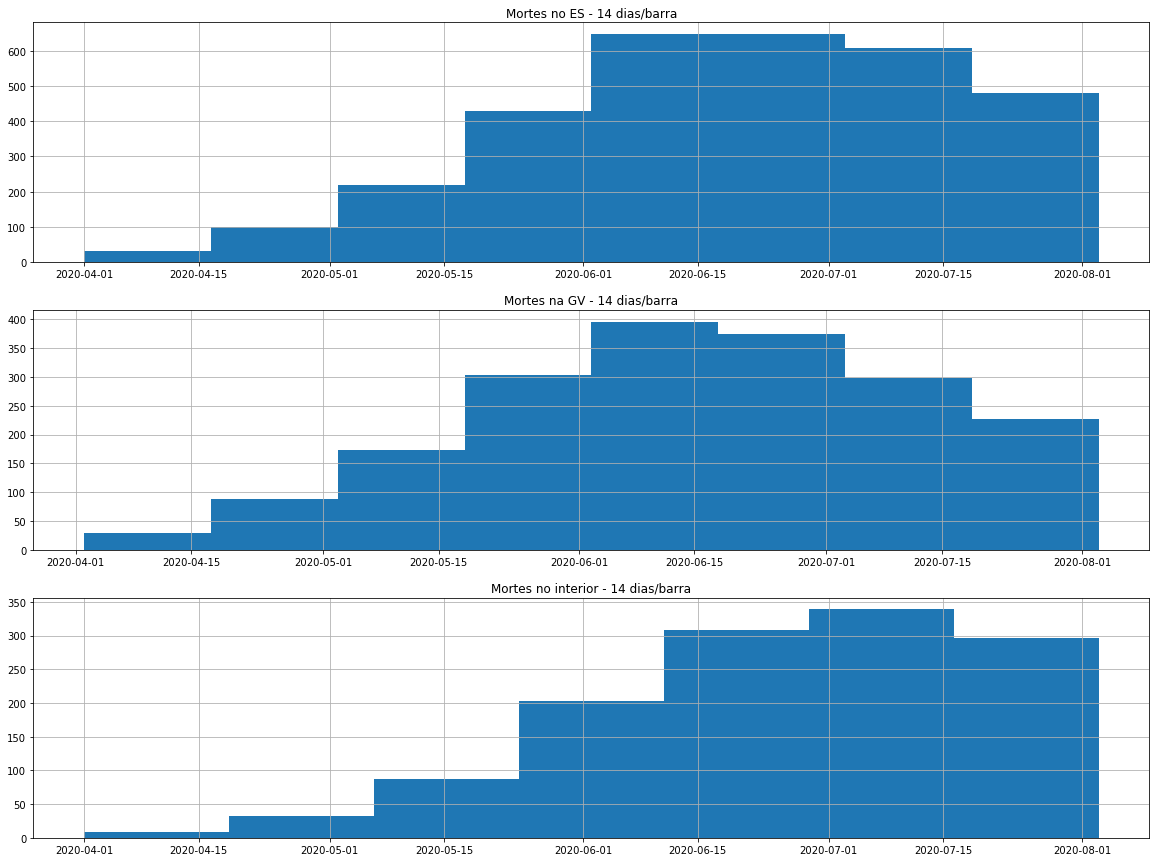

In [9]:
tam=14

plt.figure(figsize = (20,15))

plt.subplot(3,1,1)
plt.hist(data_obitos, len(dias)//tam)
plt.title('Mortes no ES - '+str(tam)+' dias/barra')
plt.grid()

plt.subplot(3,1,2)
plt.hist(data_obitos2, len(dias2)//tam)
plt.title('Mortes na GV - '+str(tam)+' dias/barra')
plt.grid()

plt.subplot(3,1,3)
plt.hist(data_obitos3, len(dias3)//tam)
plt.title('Mortes no interior - '+str(tam)+' dias/barra')
plt.grid()

plt.show()